Reading in the file
By first importing pandas

In [1]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Reading in the data frame using pandas function read_xcel

In [2]:
Germination_df = pd.read_excel('Germination_Repeat_2025.xlsx')

Testing to se if the data frame got imported right.

In [3]:
print(Germination_df.head())

   Line  Generation  Temperature  Plate  Row  Seed       Sown  \
0     1           1           22      1    1     1 2025-10-08   
1     1           1           22      1    1     2 2025-10-08   
2     1           1           22      1    1     3 2025-10-08   
3     1           1           22      1    1     4 2025-10-08   
4     1           1           22      1    1     5 2025-10-08   

  Put_in_growth_cabinet  Germinated       Identity  Germination  
0            2025-10-14         1.0  L1G1T22P1R1S1         True  
1            2025-10-14         1.0  L1G1T22P1R1S2         True  
2            2025-10-14         2.0  L1G1T22P1R1S3         True  
3            2025-10-14         1.0  L1G1T22P1R1S4         True  
4            2025-10-14         2.0  L1G1T22P1R1S5         True  


Want to make graphs to show the differences between the different generations and lines according to temperature, so need to group them by themperature.
Might want to make a new variable that is the sorted version.

Trying the code used in an erlier germination to see how the data looks.

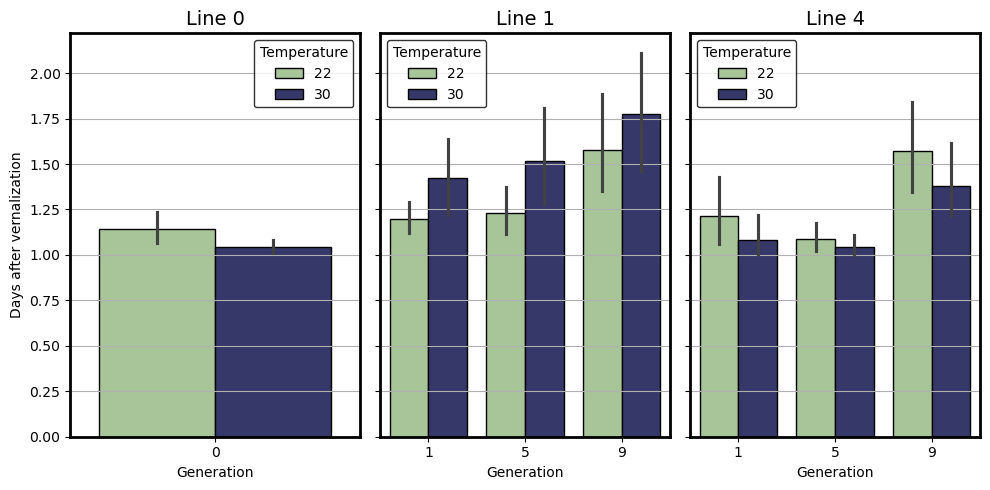

In [4]:
plt.rcParams['axes.linewidth'] = 2

plt.rcParams['axes.grid'] = True

f, axes = plt.subplots(ncols = 3, figsize = (10, 5), sharey = True)

sns.barplot(x = 'Generation', y = 'Germinated', data = Germination_df[Germination_df.Line == 0],
            hue = 'Temperature', ax = axes[0], edgecolor = 'black', palette ="crest")

sns.barplot(x = 'Generation', y = 'Germinated', data = Germination_df[Germination_df.Line == 1], 
            hue = 'Temperature', ax = axes[1], edgecolor = 'black', palette ="crest")

sns.barplot(x = 'Generation', y = 'Germinated', data = Germination_df[Germination_df.Line == 4], 
            hue = 'Temperature', ax = axes[2], edgecolor = 'black', palette ="crest")

axes[0].set_title('Line 0', fontsize=14)
axes[1].set_title('Line 1', fontsize=14)
axes[2].set_title('Line 4', fontsize=14, y=1)
axes[0].set(ylabel="Days after vernalization")
axes[0].legend(edgecolor = 'black', fontsize=12 , title="Temperature" ).set_visible(True)
#for ax in axes:

 #   ax.legend().set_visible(False)

  #  ax.set_ylabel('')

  #  ax.grid()

  #  ax.set_axisbelow(True)

  #  ax.set_ylim(0)

axes[0].legend(edgecolor = 'black', title="Temperature").set_visible(True)
axes[1].legend(edgecolor = 'black', title="Temperature").set_visible(True)
axes[2].legend(edgecolor = 'black', title="Temperature").set_visible(True)


#plt.title("Average days to germinate after vernalization for each line,generation, and temperature", y=1.05)
plt.tight_layout()
plt.show()

The old code was modified to funciton, however it is a bit noisy

Code to take the mean germination time for each plate.

In [5]:
# Making a DF of the mean time to germinate based on the plates instead of individual seeds
grouped = Germination_df.groupby(['Line', 'Generation', 'Temperature', 'Plate'])
mean_germinated = grouped['Germinated'].mean().reset_index()
print(mean_germinated)

    Line  Generation  Temperature  Plate  Germinated
0      0           0           22      1    1.224138
1      0           0           22      2    1.066667
2      0           0           30      1    1.050847
3      0           0           30      2    1.031746
4      1           1           22      1    1.183333
5      1           1           22      2    1.150000
6      1           1           22      3    1.263158
7      1           1           30      1    1.440678
8      1           1           30      2    1.559322
9      1           1           30      3    1.258621
10     1           5           22      1    1.322034
11     1           5           22      2    1.196429
12     1           5           22      3    1.172414
13     1           5           30      1    1.559322
14     1           5           30      2    1.271186
15     1           5           30      3    1.724138
16     1           9           22      1    1.722222
17     1           9           22      2    1.

Plotting the mean values as a pointplot, with the means being for each plate, thus making the variance reflect between plates 1,2,3 for each line, generation and temperature.

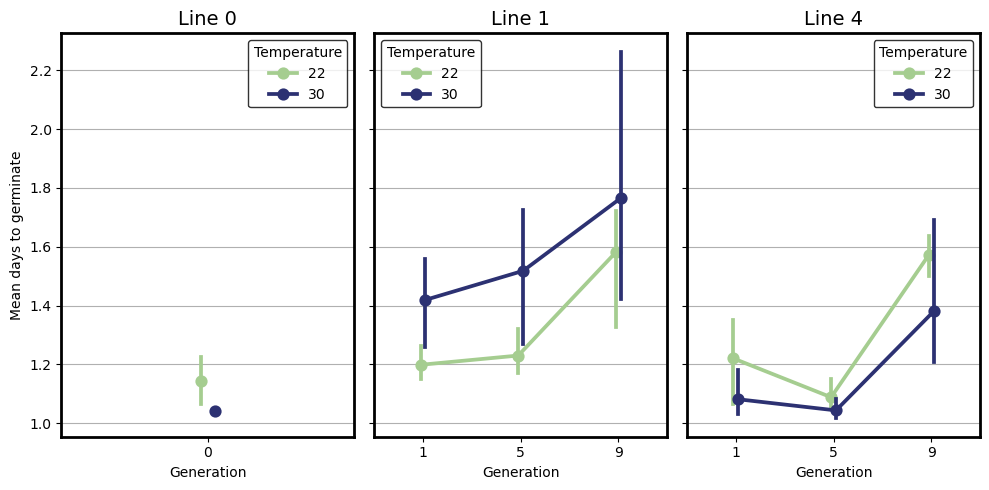

In [7]:
#Setting default line width for plots
plt.rcParams['axes.linewidth'] = 2

plt.rcParams['axes.grid'] = True

#Plotting mean germination time per plate
f, axes = plt.subplots(ncols = 3, figsize = (10, 5), sharey = True)

sns.pointplot(x = 'Generation', y = 'Germinated', data = mean_germinated[mean_germinated.Line == 0],
            hue = 'Temperature', ax = axes[0],  palette ="crest", dodge=True)

sns.pointplot(x = 'Generation', y = 'Germinated', data = mean_germinated[mean_germinated.Line == 1], 
            hue = 'Temperature', ax = axes[1],  palette ="crest", dodge=True)

sns.pointplot(x = 'Generation', y = 'Germinated', data = mean_germinated[mean_germinated.Line == 4], 
            hue = 'Temperature', ax = axes[2],  palette ="crest", dodge=True)

#Setting titles, labels, and legends
axes[0].set_title('Line 0', fontsize=14)
axes[1].set_title('Line 1', fontsize=14)
axes[2].set_title('Line 4', fontsize=14, y=1)
axes[0].set(ylabel="Mean days to germinate")
axes[0].legend(edgecolor = 'black', fontsize=12 , title="Temperature" ).set_visible(True)


axes[0].legend(edgecolor = 'black', title="Temperature").set_visible(True)
axes[1].legend(edgecolor = 'black', title="Temperature").set_visible(True)
axes[2].legend(edgecolor = 'black', title="Temperature").set_visible(True)

plt.tight_layout()
plt.show()

Here is code made by William B. Reinar to handle the picture files.

ss = []; tt = []; gfs = []; ll = []; gg = []; pp = []
# Load image
figs = {}
for file in glob.glob('../data/GerminationAssay/BilderRaw/1.11.25_spiring_cropped/*'):
    sample         = file.split('/')[-1].split('.png')[0].split('cropped_')[1]#.split('RepBilde.')[1]
    line           = int(sample[:2][1]); gen = int(sample[3]); t = sample[5:7]; p = int(sample[-1:])
    
    # Load image
    img = cv2.imread(file)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    # Define green thresholds
    #lower_green = np.array([35, 40, 40])   # H, S, V
    #upper_green = np.array([90, 255, 255])
    # Thresholds capturing blue tones
    lower_green = np.array([20, 30, 30])
    upper_green = np.array([90, 255, 255])
    # Threshold mask
    mask      = cv2.inRange(hsv, lower_green, upper_green)
    img_copy  = img
    fig, axes = plt.subplots(ncols = 2)
    axes[0].imshow(img)
    # Create black image of same shape
    masked_img = np.full_like(img, 255)
    # Copy only green pixels into masked_img
    masked_img[mask > 0] = img[mask > 0]
    axes[1].imshow(masked_img)
    # Count green pixels
    green_pixels   = np.sum(mask > 0)
    total_pixels   = img.shape[0] * img.shape[1]
    green_fraction = green_pixels / total_pixels
    
    print(sample, "Green fraction:", green_fraction)

    
    ll += [line]; gg += [gen]; tt += [t]; pp += [p]; gfs += [green_fraction]
    #plt.savefig('../data/GerminationAssay/Bilder/RepBilde2.%s.white.png' % sample, dpi = 300)
    plt.show()
    figs[sample] = fig

See a use for making a code to rename the files, since the date is given as D1, D11 etc, whilst it is more usefull to have them be D01, D11 etc.

#importing os 
import os

# Code inspied by VScode copilot.
directory = 'Cropped_germination_pictures'
for filename in os.listdir(directory):
    if filename.endswith('.png'):
        name = filename[:-4] #this removes the .png extension
        parts = name.split('_') #splits the filename into parts based on underscores eg. L0G0, P1, C22, D1

        #Code to see if the file gets split into 4 parts, and if the last part starts with D
        if len(parts) == 4 and parts[-1].startswith('D'):
            d_part = parts[-1][1:] #this makes a variable d_part that contains only the number after D

            #Check if d_part is only 1 digit, then pad the digit with a leading zero
            if len(d_part) == 1:
                new_d = 'D0' + d_part
                new_name = '_'.join(parts[:-1] + [new_d]) + '.png' #reconstruct the filename with the new D part

                #Make variablrs for old and new file paths
                old_file = os.path.join(directory, filename)
                new_file = os.path.join(directory, new_name)

                #Rename the file
                os.rename(old_file, new_file)
                #Print what was renamed
                print(f'Renamed: {filename} to {new_name}')
            
            #Print if no renaming is needed
            else:
                print(f'No renaming needed for: {filename}')
        
        #Printing if the filename does not match expected format
        else:
            print(f'Filename format unexpected, skipping: {filename}')
            


The above code is no longer needed after the first run on this pc.

# A foor loop to test the split function on the file names to see how to construct my code.
for file in glob.glob('Cropped_germination_pictures\*'):
    no_path = file.split('\\')[-1]
    no_png = no_path.split('.png')[0]
    line = int(no_png[:2][1])
    generation = int(no_png[3])
    temperature = no_png[9:11]
    date = int(no_png[-2:])
    plate = int(no_png[6])
   # print(file)
   # print(no_path)
   # print(no_png)
   # print(line)
   # print(generation)
   # print(temperature)
   # print(date)
   # print(plate)

The code bellow might be very intensive, use with caution

In [8]:
tt = []; gfs = []; ll = []; gg = []; pp = []; dd = []
# Load image
figs = {}
for file in glob.glob('Cropped_germination_pictures/*'):
    sample         = file.split('\\')[-1].split('.png')[0]
    line           = int(sample[:2][1]); gen = int(sample[3]); t = sample[9:11]; p = int(sample[6]); d = int(sample[-2:])
    
    # Load image
    img = cv2.imread(file)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    # Define green thresholds
    #lower_green = np.array([35, 40, 40])   # H, S, V
    #upper_green = np.array([90, 255, 255])
    # Thresholds capturing blue tones
    #lower_green = np.array([20, 30, 30])
    lower_green =np.array([20, 38, 27])
    upper_green = np.array([90, 255, 255])
    # Threshold mask
    mask      = cv2.inRange(hsv, lower_green, upper_green)
    img_copy  = img
    fig, axes = plt.subplots(ncols = 2)
    axes[0].imshow(img)
    # Create black image of same shape
    masked_img = np.full_like(img, 255)
    # Copy only green pixels into masked_img
    masked_img[mask > 0] = img[mask > 0]
    axes[1].imshow(masked_img)
    # Count green pixels
    green_pixels   = np.sum(mask > 0)
    total_pixels   = img.shape[0] * img.shape[1]
    green_fraction = green_pixels / total_pixels
    
    #print(sample, "Green fraction:", green_fraction)

    
    ll += [line]; gg += [gen]; tt += [t]; pp += [p]; dd += [d]; gfs += [green_fraction]
    #plt.savefig('../data/GerminationAssay/Bilder/RepBilde2.%s.white.png' % sample, dpi = 300)
    #plt.show()
    #figs[sample] = fig
    plt.close(fig)  # Close the figure after processing

   Line  Generation Temperature  Plate  Day  GreenFraction
0     0           0          22      1    1       0.000449
1     0           0          22      1    2       0.001490
2     0           0          22      1    3       0.002211
3     0           0          22      1    4       0.005363
4     0           0          22      1    5       0.006359


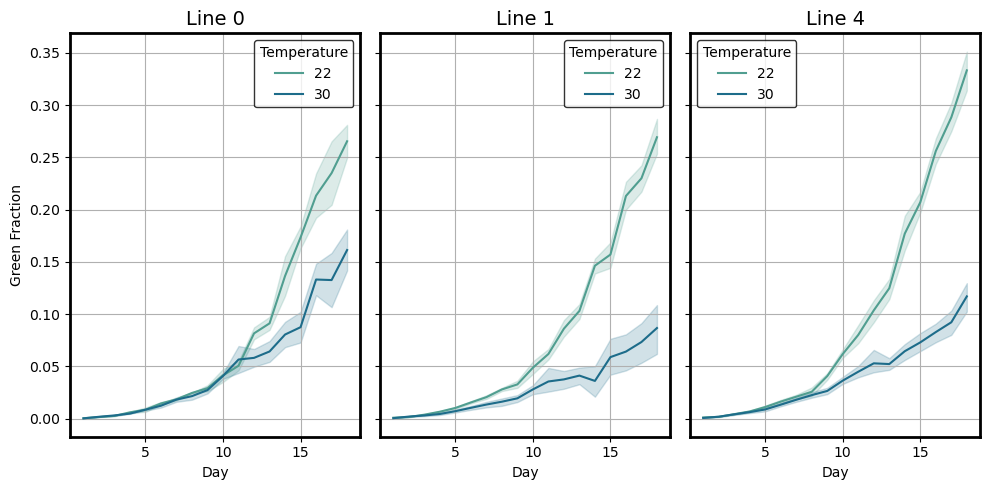

In [13]:
#Making a DF of the green fractions
green_fraction_df = pd.DataFrame({'Line': ll, 'Generation': gg, 'Temperature': tt, 'Plate': pp, 'Day': dd, 'GreenFraction': gfs})
print(green_fraction_df.head())

#Plotting green fraction per plate and day
f, axes = plt.subplots(ncols = 3, figsize = (10, 5), sharey = True)
sns.lineplot(x = 'Day', y = 'GreenFraction', data = green_fraction_df[green_fraction_df.Line == 0],
            hue = 'Temperature', ax = axes[0], palette ="crest")
sns.lineplot(x = 'Day', y = 'GreenFraction', data = green_fraction_df[green_fraction_df.Line == 1],
            hue = 'Temperature', ax = axes[1], palette ="crest")
sns.lineplot(x = 'Day', y = 'GreenFraction', data = green_fraction_df[green_fraction_df.Line == 4],
            hue = 'Temperature', ax = axes[2], palette ="crest")
axes[0].set_title('Line 0', fontsize=14)
axes[1].set_title('Line 1', fontsize=14)
axes[2].set_title('Line 4', fontsize=14, y=1)
axes[0].set(ylabel="Green Fraction")
axes[0].legend(edgecolor = 'black', title="Temperature").set_visible(True)
axes[1].legend(edgecolor = 'black', title="Temperature").set_visible(True)
axes[2].legend(edgecolor = 'black', title="Temperature").set_visible(True)
plt.tight_layout()
plt.show()
